# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Type your code here# Import pustaka dasar
import pandas as pd
import numpy as np

# Import pustaka untuk machine learning
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Dicoding BMLP/data_clustered.csv"

df = pd.read_csv(file_path)

In [ ]:
print(df.head())

    Brands Colors  Rating  Selling Price  Discount             Type  \
0  SAMSUNG  Black     4.3        19330.0    1669.0        Mid-range   
1    Nokia  Other     3.8        10199.0       0.0        Mid-range   
2  Infinix   Blue     4.2        12999.0       0.0        Mid-range   
3    Apple  Black     4.6        49900.0       0.0  Upper mid-range   
4   GIONEE  Black     4.0         2199.0       0.0      Entry-level   

   Memory_MB  Storage_MB  Cluster  
0     8192.0    131072.0        1  
1     2048.0     16384.0        2  
2     4096.0     65536.0        3  
3     4096.0     65536.0        0  
4        8.0        16.0        0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brands         2146 non-null   object 
 1   Colors         2146 non-null   object 
 2   Rating         2146 non-null   float64
 3   Selling Price  2146 non-null   float64
 4   Discount       2146 non-null   float64
 5   Type           2146 non-null   object 
 6   Memory_MB      2146 non-null   float64
 7   Storage_MB     2146 non-null   float64
 8   Cluster        2146 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 151.0+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
label_encoders = {}

# Encode setiap kolom kategorikal
categorical_cols = ["Brands", "Colors", "Type"]
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Simpan encoder untuk inverse transform nanti


In [ ]:
df.head()

,Brands,Colors,Rating,Selling Price,Discount,Type,Memory_MB,Storage_MB,Cluster
0,13,0,4.3,19330.0,1669.0,2,8192.0,131072.0,1
1,10,4,3.8,10199.0,0.0,2,2048.0,16384.0,2
2,6,1,4.2,12999.0,0.0,2,4096.0,65536.0,3
3,1,0,4.6,49900.0,0.0,3,4096.0,65536.0,0
4,2,0,4.0,2199.0,0.0,0,8.0,16.0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

# Membagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek jumlah data latih dan data uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 1716
Jumlah data uji: 430


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

- Random Forest: Model berbasis ensemble yang terdiri dari banyak Decision Tree untuk mengurangi overfitting dan meningkatkan akurasi.

- K-Nearest Neighbors (KNN): Algoritma berbasis kedekatan yang mengklasifikasikan data berdasarkan mayoritas tetangga terdekatnya.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
# Prediksi pada data uji
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi dengan Accuracy dan F1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

f1_rf = f1_score(y_test, y_pred_rf, average="weighted")
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1-Score: {f1_rf:.4f}")
print(f"KNN - Accuracy: {accuracy_knn:.4f}, F1-Score: {f1_knn:.4f}")

Random Forest - Accuracy: 0.9953, F1-Score: 0.9953
KNN - Accuracy: 0.4419, F1-Score: 0.4246


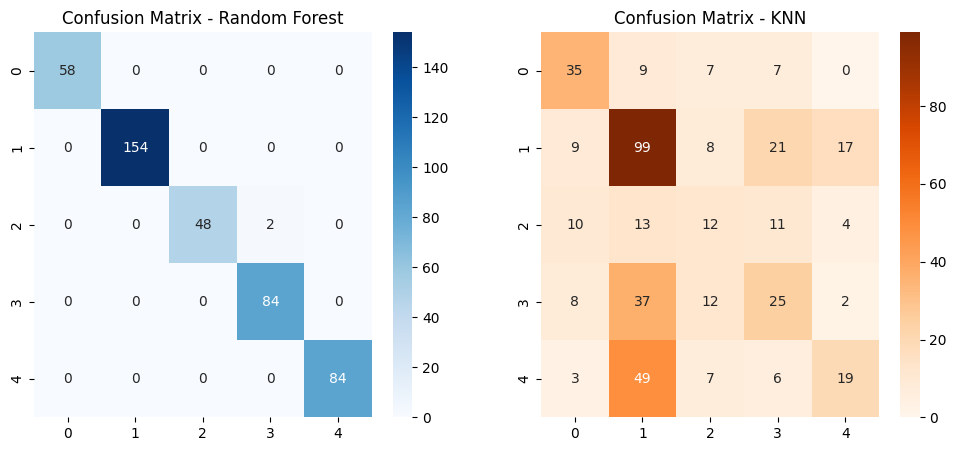

In [ ]:
# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - KNN")

plt.show()

Random Forest
- Accuracy: 0.9953,
- F1-Score: 0.9953
- Hampir tidak ada kesalahan klasifikasi.(2 data dikategorikan ke cluster 2, yang seharusnya cluster 3)

KNN
- Accuracy: 0.4419
- F1-Score: 0.4246
- Kelas 1 mengalami misprediksi cukup tinggi dibandingkan kelas lain

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here# Gunakan model terbaik
best_knn = grid_search_knn.best_estimator_

# Evaluasi model terbaik
y_pred_knn = best_knn.predict(X_test)
print("Best KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Best KNN F1-Score:", f1_score(y_test, y_pred_knn, average='weighted'))


Best KNN Accuracy: 0.5581395348837209
Best KNN F1-Score: 0.5538241042866281


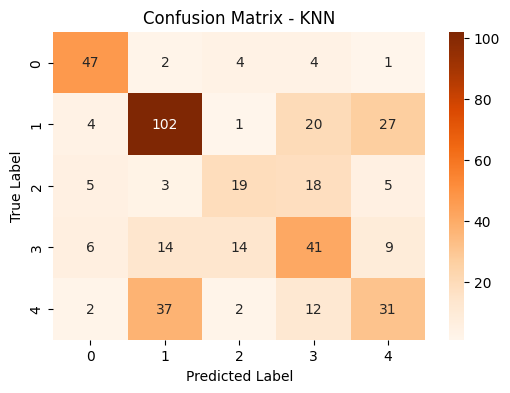

In [ ]:
# Buat Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualisasi dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Hasil evaluasi

- Random Forest :
 - Accuracy: 0.9953 ; F1-Score: 0.9953
 - (tidak dilakukan tuning model karena hasil yang sudah bagus

- KNN :
 - Accuracy: 0.4419 ; F1-Score: 0.4246 (sebelum tuning)
 - Accuracy: 0.5581 ; F1-Score: 0.5538 (sesudah tuning)


2. Identifikasi kelemahan model :

- Random Forest
 - Kemungkinan Overfitting dikarenakan performa sangat tinggi, bisa jadi model terlalu "hapal" dengan data latih dan kurang generalisasi untuk data baru

- KNN
 - Underfitting, Model kurang mampu menangkap pola dalam data.
 - Precision dan Recall rendah untuk beberapa kelas. Ini adalah indikasi bahwa model sulit membedakan antar kelas dengan baik.

3. Rekomendasi tindakan lanjutan
- Random Forest:
 - Penambahan data validasi tambahan untuk memastikan tidak terjadi overfitting.

- KNN:
 - Mungkin KNN bukan algoritma terbaik untuk dataset ini  
